My name is Sandesh Khanal and in this project I will be making a model which will ask question and tell us about the animal of which kind is it.

The Source: https://www.kaggle.com/datasets/uciml/zoo-animal-classification

The Goal: Predict if an animal is a Mammal, Bird, Reptile, Fish, Amphibian, Bug, or Invertebrate based on physical traits.

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("Loading Zoo Data from UCI Archive...")

# Official UCI URL (Raw data without headers)
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/zoo/zoo.data"



# Load it
df = pd.read_csv(url)

print(f"Animals Loaded: {df.shape[0]}")
df.head()

Loading Zoo Data from UCI Archive...
Animals Loaded: 100


,aardvark,1,0,0.1,1.1,0.2,0.3,1.2,1.3,1.4,1.5,0.4,0.5,4,0.6,0.7,1.6,1.7
0,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
1,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
2,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
3,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
4,buffalo,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1


In [10]:

# We need to define the column names manually
column_names = ['animal_name', 'hair', 'feathers', 'eggs', 'milk', 'airborne',
                'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous',
                'fins', 'legs', 'tail', 'domestic', 'catsize', 'class_type']

# Load it
df = pd.read_csv(url, names=column_names)

df.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


# 2. Data Cleaning

In [12]:
#  Map Class Numbers to Names
class_names = {1:'Mammal', 2:'Bird', 3:'Reptile', 4:'Fish',
               5:'Amphibian', 6:'Bug', 7:'Invertebrate'}

df['category'] = df['class_type'].map(class_names)

# Drop 'animal_name' for training
# We keep 'animal_name' separately for reference
animal_names = df['animal_name']
df_train = df.drop(['animal_name', 'category'], axis=1)

print("Target Categories:")
print(df['category'].value_counts())

Target Categories:
category
Mammal          41
Bird            20
Fish            13
Invertebrate    10
Bug              8
Reptile          5
Amphibian        4
Name: count, dtype: int64


# 3. Visualization

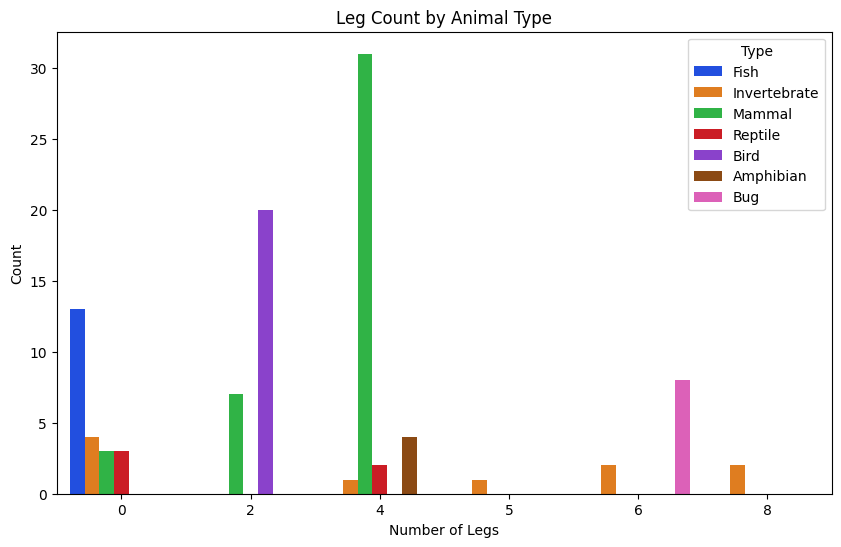

In [14]:
plt.figure(figsize=(10, 6))

sns.countplot(data=df, x='legs', hue='category', palette='bright')
plt.title("Leg Count by Animal Type")
plt.xlabel("Number of Legs")
plt.ylabel("Count")
plt.legend(title='Type')
plt.show()

# 4. Splitting the data

In [15]:
from sklearn.model_selection import train_test_split

X = df.drop(['class_type', 'animal_name', 'category'], axis=1)
y = df['class_type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training on {len(X_train)} animals.")

Training on 80 animals.


# 5. Training the Model

Model Accuracy: 95.24%


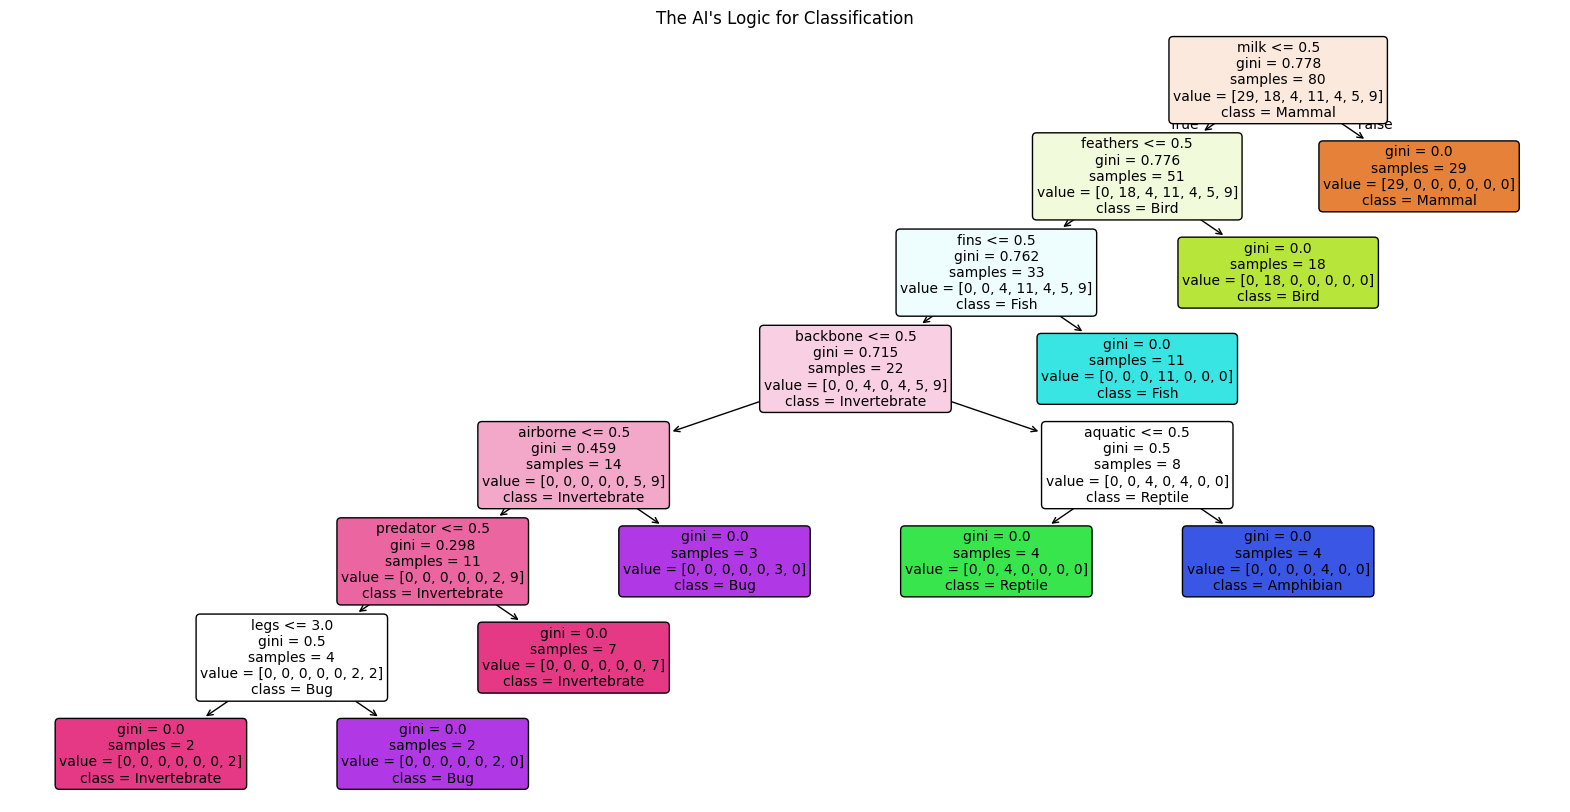

In [16]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score

# Train
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Score
y_pred = model.predict(X_test)
print(f"Model Accuracy: {accuracy_score(y_test, y_pred):.2%}")

# Draw the "Brain"
plt.figure(figsize=(20, 10))
plot_tree(model,
          feature_names=X.columns,
          class_names=list(class_names.values()),
          filled=True, rounded=True, fontsize=10)
plt.title("The AI's Logic for Classification")
plt.show()

# 6. Let's Run the Model

In [17]:
def classify_creature():
    print("\n--- 🦁 NEW SPECIES DISCOVERED ---")
    print("Answer the traits of your mystery animal (1=Yes, 0=No):")

    try:
        # We ask for the most important traits used by the tree
        hair = int(input("Has Hair? (1/0): "))
        feathers = int(input("Has Feathers? (1/0): "))
        eggs = int(input("Lays Eggs? (1/0): "))
        milk = int(input("Produces Milk? (1/0): "))
        airborne = int(input("Can Fly? (1/0): "))
        aquatic = int(input("Lives in Water? (1/0): "))
        predator = int(input("Is Predator? (1/0): "))
        toothed = int(input("Has Teeth? (1/0): "))
        backbone = int(input("Has Backbone? (1/0): "))
        breathes = int(input("Breathes Air? (1/0): "))
        venomous = int(input("Is Venomous? (1/0): "))
        fins = int(input("Has Fins? (1/0): "))
        legs = int(input("Number of Legs (0,2,4,5,6,8): "))
        tail = int(input("Has Tail? (1/0): "))
        domestic = int(input("Is Domestic? (1/0): "))
        catsize = int(input("Is it Cat-sized or larger? (1/0): "))

        # Create array
        traits = [[hair, feathers, eggs, milk, airborne, aquatic, predator, toothed,
                   backbone, breathes, venomous, fins, legs, tail, domestic, catsize]]

        # Predict
        prediction_code = model.predict(traits)[0]
        prediction_name = class_names[prediction_code]

        print(f"\n🧬 AI ANALYSIS: This animal is classified as a {prediction_name.upper()}!")

    except ValueError:
        print("Please enter 1 or 0 only (except for legs).")

# Run it
classify_creature()


--- 🦁 NEW SPECIES DISCOVERED ---
Answer the traits of your mystery animal (1=Yes, 0=No):
Has Hair? (1/0): 1
Has Feathers? (1/0): 0
Lays Eggs? (1/0): 1
Produces Milk? (1/0): 0
Can Fly? (1/0): 1
Lives in Water? (1/0): 0
Is Predator? (1/0): 1
Has Teeth? (1/0): 0
Has Backbone? (1/0): 1
Breathes Air? (1/0): 0
Is Venomous? (1/0): 1
Has Fins? (1/0): 0
Number of Legs (0,2,4,5,6,8): 2
Has Tail? (1/0): 0
Is Domestic? (1/0): 1
Is it Cat-sized or larger? (1/0): 0

🧬 AI ANALYSIS: This animal is classified as a REPTILE!


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
